## Train a simple convnet on the Fashion MNIST dataset with Data Augmentation

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from comet_ml import Experiment
experiment = Experiment(
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    project_name="FASHION MNIST" , api_key = "4S68i3O3gBXtDaJ4MLbF50a8n" , log_code = True)


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ashishpal2702/fashion-mnist/c32b23e303fd4bbf84de9b382e0fb383



In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [22]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [29]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [33]:
# Deine Model
vgg = Sequential()

vgg.add(Convolution2D(64, 3, 3, input_shape=(28, 28, 1)))
vgg.add(Activation('relu'))
vgg.add(Convolution2D(64, 3, 3))
vgg.add(Activation('relu'))
vgg.add(MaxPooling2D(pool_size=(2,2)))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Flatten())
vgg.add(Dense(units=4096,activation="relu"))
vgg.add(Dense(units=4096,activation="relu"))
vgg.add(Dense(units=10, activation="softmax"))

# Loss and Optimizer
vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [34]:
vgg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 9, 9, 64)          640       
_________________________________________________________________
activation_55 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
activation_56 (Activation)   (None, 3, 3, 64)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 1, 1, 128)        

In [43]:
import os
#os.mkdir("my_logs")
root_logdir = os.path.join(os.curdir, "my_logs_aug")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_vgg.h5")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [tensorboard_cb,checkpoint_cb,early_stopping]

In [44]:
#Fit_Generator
history = vgg.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=32),
                    epochs=2,
                    validation_data=(x_test, y_test), callbacks=callback_list)

  ...
    to  
  ['...']


COMET WARNING: Set model graph by 'keras' ignored; already called. Future attempts are silently ignored.


Train for 1875 steps, validate on 10000 samples
Epoch 1/2
1875/1875 [==============================] - 281s 150ms/step - loss: 0.4262 - accuracy: 0.8415 - val_loss: 0.4633 - val_accuracy: 0.8330
Epoch 2/2
1875/1875 [==============================] - 287s 153ms/step - loss: 0.4257 - accuracy: 0.8438 - val_loss: 0.4736 - val_accuracy: 0.8305


In [46]:
vgg.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 450us/sample - loss: 0.4736 - accuracy: 0.8305


[0.47358923921585083, 0.8305]

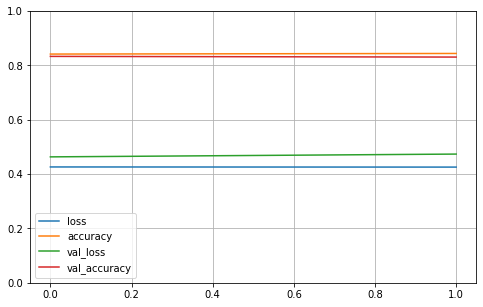

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [45]:
#will log metrics with the prefix 'test_'
with experiment.test():
    test_loss, test_accuracy = vgg.evaluate(x_test, y_test)
    train_loss, train_accuracy = vgg.evaluate(x_train, y_train)
    metrics = {
        'train_loss':train_loss,
        'train_accuracy':train_accuracy,
        'test_loss':test_loss,
        'test_accuracy':test_accuracy,
    }
    experiment.log_metrics(metrics)

experiment.log_dataset_hash(x_train) 

60000/60000 [==============================] - 26s 425us/sample - loss: 0.4093 - accuracy: 0.8461


In [48]:
experiment.log_model("FASHION MNIST with aug TF", "my_keras_model_vgg.h5")

{'web': 'https://www.comet.ml/api/asset/download?assetId=741d1a661e56473a84f2a0d8f5270496&experimentKey=c32b23e303fd4bbf84de9b382e0fb383',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=741d1a661e56473a84f2a0d8f5270496&experimentKey=c32b23e303fd4bbf84de9b382e0fb383',
 'assetId': '741d1a661e56473a84f2a0d8f5270496'}